# Introduction to Thermodynamics and Statistical Physics

In this lecture, we are going to discuss:

* The Debye theory for a solid.
* The Joule & Joule-Thompson Effects.

## The Debye model

The key difference between Einstein's theory and Debye's is that in the Einstein model, it is assumed that all of the atoms are vibrating about their equilibrium positions independantly with the exact same frequency. The Debye model builds on this by allowing the oscillators within the system to have a distribution of frequencies.

Fortunately, we have already developed part of the framework we need for this task. Recalling the definition of the density of states from Lecture 12, we will modify it to represent the density of vibrational states, $g(\omega)$. We will impose the requirement that if we intergate the density of vibrational states over the entire frequency range, we should get back the total number of phonons in our system, $3N$. That is
$$
    \int g(\omega) {\rm d} \omega = 3N
$$

Debye used the following knowledge to determine an appropriate distribution of frequencies - we know that vibrational waves will travel through the solid with a speed equal to the speed of sound of the solid. That is
$$
    \omega = v_{s}q
$$
where q is the wave vector of the lattice vibrations. The density of these vibrations is given as
$$
    g(q) {\rm d} q = \frac{4\pi q^2 {\rm d} q}{(2\pi/L)^3} \times 3
$$
where the factor of 3 comes from the allowed polarisations of the wave, and we have assumed the crystal is a cube of side $L$. Tidying up a bit gives
$$
    g(q) {\rm d} q = \frac{3 V q^2 {\rm d} q}{2\pi^2}
$$
which, in terms of $\omega$, is
$$
    g(\omega) {\rm d} \omega = \frac{3 V \omega^2 {\rm d} \omega}{2\pi^2 v_{s}^3}
$$
The next assumption Debye allowed for is that, since there is a maximum of $3N$ modes in the crystal, there exists a maximum frequency (the Debye frequency) such that
$$
    \int_0^{\omega_{\rm D}} g(\omega) {\rm d} \omega = 3N
$$
which, after substituting in for $g(\omega)$, gives
$$
    \omega_{\rm D} = \left( \frac{6 N \pi^2 v_{\rm s}^3 }{V} \right) ^{1/3}
$$
which also let's us write
$$
    g(\omega) {\rm d} \omega = \frac{9 N \omega^2 {\rm d} \omega}{\omega_{\rm D}^3}
$$
Now, we'll define the Debye temperature as
$$
    \Theta_{\rm D} = \frac{\hbar \omega_{\rm D}}{k_{\rm B}}
$$

So the question we now need to ask is "is the predicted heat capacity versus temperature from this model a better match to our data?". Let's work out an expression for it and see.

Starting with the partition function, we'll have
$$
    \ln(Z) = \int_0^{\omega_{\rm D}} {\rm d} \omega \; g(\omega) \; ln \left[ \frac{e^{-\hbar \omega \beta/2}}{1-e^{-\hbar \omega \beta}} \right]
$$
Breaking this integral up gives
$$
    \ln(Z) = -\int_0^{\omega_{\rm D}} \; \frac{1}{2} \hbar \omega \beta g(\omega)  {\rm d} \omega + \int_0^{\omega_{\rm D}} \; g(\omega) \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
which in turn gives
$$
    \ln(Z) = -\frac{9}{8} N \hbar \omega_{\rm D} \beta -\frac{9 N}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \omega^2 \ln[1-e^{-\hbar \omega \beta}] {\rm d} \omega
$$
The internal energy is then
$$
    U = - \frac{\partial \ln(Z)}{\partial \beta} = -\frac{9}{8} N \hbar \omega_{\rm D} + \frac{9 N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{\omega^2} {e^{\hbar \omega \beta}-1} {\rm d} \omega
$$
Finally, the heat capacity is then
$$
    C_{\rm V} = \left( \frac{\partial \langle U \rangle}{\partial T} \right)_V
$$
$$
    C_{\rm V} = \frac{9N \hbar}{\omega_{\rm D}^3} \int_0^{\omega_{\rm D}} \frac{-\omega^3 {\rm d} \omega}{e^{\hbar \omega \beta}-1} e^{\hbar \omega \beta} \left( - \frac{\hbar \omega} {k_{\rm B} T^2} \right)
$$
which simplifies to
$$
    C_{\rm V} = \frac{9 R}{x_{\rm D}^3}  \int_0^{x_{\rm D}} \frac{x^4e^{x}}{(e^{x}-1)^2}
$$
where $x=\hbar \beta \omega$ and $x_{\rm D}=\hbar \beta \omega_{\rm D}$.

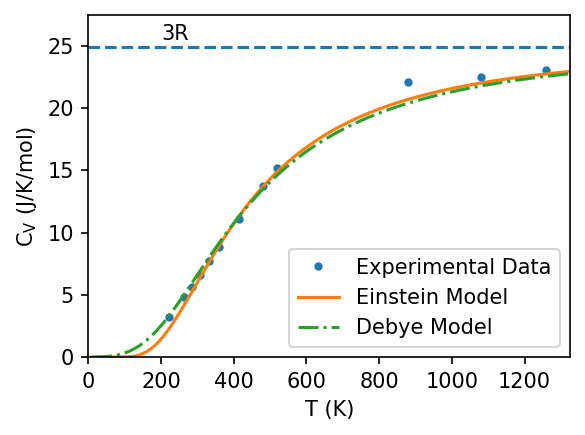

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as c

def f(x):
    #This is simply the function in the integral above
    return x**4*np.exp(x)/(np.exp(x)-1)**2

#First, we need to calculate x_D for all temperatures, assuming T_D = 1800*u.K
T_D = 1800*u.K
x_Ds = T_D/T

#We now need to loop over the integration, for each x_D
Cv_Debye = np.array([])*u.J/u.K/u.mol

for x_D in x_Ds:
    res, err = quad(f, 0.0, x_D) # This numerical integration function returns both the integrated value and an estimate of the error
    Cv_Debye = np.append(Cv_Debye,9*c.R*res/x_D**3)

plt.figure(figsize=[4,3], dpi=150)
plt.plot(temp,Cv,'.',label='Experimental Data')
plt.plot(T,Cv_Einstein,'-',label='Einstein Model')
plt.plot(T,Cv_Debye,'-.',label='Debye Model')
plt.axhline(3*c.R.value,linestyle='--')
plt.text(200,25.5, '3R')
plt.xlabel(r"T (K)")
plt.ylabel(r"C$_{\rm V}$ (J/K/mol)")
plt.ylim(0,27.5)
plt.xlim(0,1325)
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Debye_Einstein_Model_vs_Data.jpg")
plt.show()

## The Joule effect (revisited)

In our final discussion around how real gases differ from an ideal gas, we are going to return to the Joule expansions which was introduced in Lecture 5. In this expansion, a gas which is initially on the left side of a container is suddenly allowed to expand into the right. If the system is entirely isolated, then no work is done on the gas, and it cannot exchange heat with its surroundings. As such, the internal energy of the gas remains constant.

![Joule_Expansion](Figures/Joule_Expansion.png)

In this scenario, we are interested in answering the following question: after opening the valve, does the temperature of the gas change, does it cool, or does it warm up? To answer this, we will need to evalvuate the Joule coefficient, which we define as
$$
    \mu_{\rm J} = \left( \frac{\partial T}{\partial V} \right)_U
$$
It's been a while since we've used this trick, so it's worth recalling that
$$
    \left( \frac{\partial T}{\partial V} \right)_U \left( \frac{\partial V}{\partial U} \right)_T \left( \frac{\partial U}{\partial T} \right)_V = -1
$$
such that 
$$
    \left( \frac{\partial T}{\partial V} \right)_U = - \left( \frac{\partial U}{\partial V} \right)_T \left( \frac{\partial T}{\partial U} \right)_V
$$
so the Joule coefficient can be written as
$$
    \mu_J = - \left( \frac{\partial T}{\partial U} \right)_V \left( \frac{\partial U}{\partial V} \right)_T  = - \frac{1}{C_{\rm V}} \left( \frac{\partial U}{\partial V} \right)_T
$$
That last term is still a bit tricky to work with, so let's work to restructure this equation into something easier. First, from the fundamental thermodynamic relation we have that
$$
    {\rm d} U = T {\rm d} S - P {\rm d} V
$$
which implies that
$$
    \left(\frac{\partial U}{\partial V} \right)_T = T \left(\frac{\partial S}{\partial V} \right)_T - P
$$
Recalling the Maxwell relation
$$
  \left(\frac{\partial S}{\partial V} \right)_T =   \left(\frac{\partial P}{\partial T} \right)_V
$$
we get
$$
    \left(\frac{\partial U}{\partial V} \right)_T = T \left(\frac{\partial P}{\partial T} \right)_V - P.
$$
This finally gives the expression
$$
    \mu_{\rm J} = - \frac{1}{C_{\rm V}} \left[ T \left(\frac{\partial P}{\partial T} \right)_V - P \right]
$$
For an ideal gas, $PV = N k_{\rm B} T$. As such, 
$$
    \left(\frac{\partial P}{\partial T} \right)_V = \frac{N k_{\rm B}}{V}
$$
and
$$
    T \left(\frac{\partial P}{\partial T} \right)_V = P
$$
This means the Joule coefficient is 0 for an ideal gas, which means the temperature of the ideal gas does not change during the expansion.

However, as we now know, an ideal isn't always the appropriate equation of state to adopt for this situation. Let's instead assume we have a Van der Waals gas:
$$
    \left(P + \frac{a}{V^2}\right) (V - b) = N k_{\rm B} T
$$
where $a$ is related to interatomic spacing and $b$ is due to the non-zero volume occupied by molecules in our gas. In this case
$$
    \left(\frac{\partial P}{\partial T} \right)_V  = \frac{N k_{\rm B}}{(V - b)}
$$
which means the Joule coefficient is
$$
    \mu_{\rm J} = - \frac{a}{C_{\rm V}V^2}
$$
This is negative since $a$, $C_{\rm V}$, and $V^2$ are all positive, which means that
$$
    \left( \frac{\partial T}{\partial V} \right)_U < 0.
$$
That is, a real gas cools as it expands during a Joule expansion. This means that if we had a gas and wanted to cool it, we could use the Joule effect to do it without doing any work on the gas.

However, the setup is not really useful in real world situations (how often do you have a gas totally isolated to one side of a chamber, and then let it expand? Also, what would you even do with it afterwards?).

This brings us on to...

## The Joule Thomson Expansion

The Joule-Thompson builds on this initial picture. Instead of a container with a stationary gas, and where we let the gas change volume at constant energy, it instead assumes we have a steady flow of gas from a high pressure region at $P_1$ to a low pressure region at $P_2$ via a throttle (or a porous plug, something that can maintain the pressure difference).

![Joule_Expansion](Figures/Joule_Thompson_Expansion.png)

This is an irreversible process. However, since the initial and final states are both equilibria states, we can pretend that it does happen reversibly. This leads to the following treatment.

Any gas that is entering into throttle must have work equal to $P_1 V_1$ done on it. After the gas has passed through the throttle, it will expand to pressure $P_2$, thus doing work $P_2 V_2$ on whatever gas was there before. As such, the total work done on the gas as it is compressed and then expands is $W= P_1V_1 - P_2V_2$. Assuming the system is thermally isolated, this means that the change in internal energy of the gas must be $U_2 - U_1 = P_2V_2 - P_1V_1$ which gives
$$
    U_1+ P_1V_1=U_2+ P_2V_2
$$
Since we know that the enthalpy is $H=U+PV$, this means that
$$
    H_1 = H_2.
$$
That is, the enthalpy is conserved in such a process! So for this process, we want to ask the question: "What is the change in temperature with respect to pressure, when performed at constant enthalpy?" or, more formally, we will define the Joule-Thomson coefficient to be
$$
    \mu_{\rm JT} = \left( \frac{\partial T}{\partial P} \right) _H.
$$
As done above, we can subsitute the partial derivative term with
$$
    \left( \frac{\partial T}{\partial P} \right) _H = - \left( \frac{\partial T}{\partial H} \right) _P \left( \frac{\partial H}{\partial P} \right)_T
$$
which means we can write $\mu_{\rm JT}$ to be
$$
    \mu_{\rm JT} = - \frac{1}{C_{\rm P}} \left( \frac{\partial H}{\partial P} \right)_T
$$
We also know that ${\rm d} H = T {\rm d} S +V {\rm d} P$ (see Lecture 7), giving
$$
    \left( \frac{\partial H}{\partial P} \right)_T = T \left( \frac{\partial S}{\partial P} \right)_T + V
$$
leading to
$$
    \mu_{\rm JT} = \frac{1}{C_{\rm P}} \left[ T \left( \frac{\partial V}{\partial T} \right)_P - V \right]
$$
where we've used a Maxwell relation to replace the partial derivative that was there.

It's worth comparing this to the Joule coefficient for a moment. For $\mu_{\rm J}$, we had to evaluate $\left(\frac{\partial P}{\partial T} \right)_V$ for both an ideal gas and a Van der Waals gas to determine the sign of the coefficient, and we found that it's always negative for any gas. However, for $\mu_{\rm J}$, we instead need to evaluate $\left( \frac{\partial V}{\partial T} \right)_P$. This is fine for an ideal gas, but even just for a Van der Waals gas, it is very difficult (give it a try if you don't believe me).

The key point to take away is that $\mu_{\rm J}$ can take either a positive or a negative sign. The point at which the coefficient vanishes is given by
$$
    T \left( \frac{\partial V}{\partial T} \right)_P - V = 0
$$
or when
$$
    \left( \frac{\partial V}{\partial T} \right)_P = \frac{V}{T}
$$
This equation defines a curve in the T-P plane, and is known as the inversion curve. I still need to develop a good example for this, which will be added soon.